PCA on IRIS Data set

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header= None)
df.columns = ['Sepal_Len','Sepal_wid','Petal_Len','Petal_Len','Class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [13]:
df.tail()

,Sepal_Len,Sepal_wid,Petal_Len,Petal_Len,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [24]:
#split data table into X and class labels y
X = df.iloc[: , 0:4].values

y = df.iloc[:,4].values

In [26]:
type(X)

numpy.ndarray

In [27]:
type(y)

numpy.ndarray

Visualization

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [30]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

In [31]:
feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

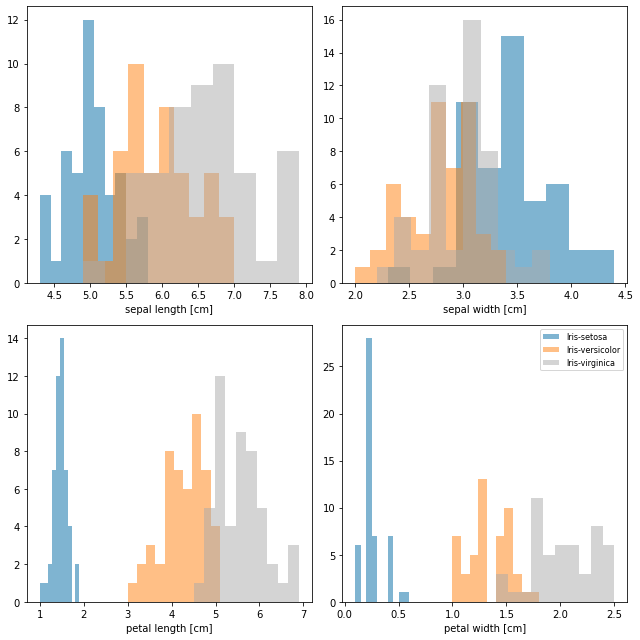

In [40]:
with plt.style.context('tableau-colorblind10'):#seaborn-whitegrid
    plt.figure(figsize= (9, 9))
    
    for cnt in range(4):
        plt.subplot(2, 2, cnt + 1)
        
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y == lab, cnt],
                    label = lab,
                    bins = 10,
                    alpha = 0.5)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc = 'upper right', fancybox = True, fontsize = 8)
    
    plt.tight_layout()
    plt.show()
    

Standerdizing

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
X_std = StandardScaler().fit_transform(X)

In [44]:
type (X_std)

numpy.ndarray

1 - Eigendecomposition - Computing Eigenvectors and Eigenvalues

Covariance Matrix

In [46]:
mean_vec = np.mean(X_std, axis= 0)
mean_vec

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [54]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0] - 1)
print('Covariance Matrix \n',cov_mat)

Covariance Matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [55]:
X_std.shape[0]

150

In [64]:
print('NumPy covariance matrix: \n',np.cov(X_std.T))

NumPy covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Next, we perform an eigendecomposition on the covariance matrix:

In [65]:
cov_mat = np.cov(X_std.T)

In [66]:
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [67]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [68]:
eig_val

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [69]:
eig_vec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

Correlation Matrixc- in the field of “Finance,” the correlation matrix typically used instead of the covariance matrix, correlation matrix can be understood as the normalized covariance matrix.

In [70]:
cor_mat1 = np.corrcoef(X_std.T)

In [71]:
cor_mat1

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [72]:
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

In [73]:
eig_vals

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [74]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

Eigendecomposition of the raw data based on the correlation matrix:

In [75]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

In [76]:
eig_vals

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [77]:
eig_vecs

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

1. Eigendecomposition of the covariance matrix after standardizing the data.
2. Eigendecomposition of the correlation matrix.
3. Eigendecomposition of the correlation matrix after standardizing the data.

Singular Value Decomposition
1. While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Value Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

In [78]:
u,s,v = np.linalg.svd(X_std.T)

In [79]:
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [80]:
s

array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839])

2- Selecting Principal Components

Sorting Eigenpairs

In [84]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1, np.linalg.norm(ev))
print('Nicely Done')

Nicely Done


In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues

common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [90]:
#list of eign val and vec
eig_pairs = [np.abs(eig_vals[i], eig_vecs[: , i]) for i in range(len(eig_vals))]

In [93]:
eig_vals

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

In [95]:
eig_vecs

array([[2.91081808, 0.92122093, 0.14735328, 0.02060771],
       [2.91081808, 0.92122093, 0.14735328, 0.02060771],
       [2.91081808, 0.92122093, 0.14735328, 0.02060771],
       [2.91081808, 0.92122093, 0.14735328, 0.02060771]])

In [94]:
eig_vecs[:, 2]

array([0.14735328, 0.14735328, 0.14735328, 0.14735328])

In [91]:
eig_pairs

[array([2.91081808, 2.91081808, 2.91081808, 2.91081808]),
 array([0.92122093, 0.92122093, 0.92122093, 0.92122093]),
 array([0.14735328, 0.14735328, 0.14735328, 0.14735328]),
 array([0.02060771, 0.02060771, 0.02060771, 0.02060771])]

In [117]:
eig_pairs.sort(key=lambda x: x[0], reverse=True) ## Sort the (eigenvalue, eigenvector) tuples from high to low

In [118]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.910818083752054
0.9212209307072242
0.14735327830509573
0.020607707235625678


Explained Variance

After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” 

In [119]:
tot = sum(eig_vals)

In [120]:
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse= True)]
cum_var_exp = np.cumsum(var_exp)

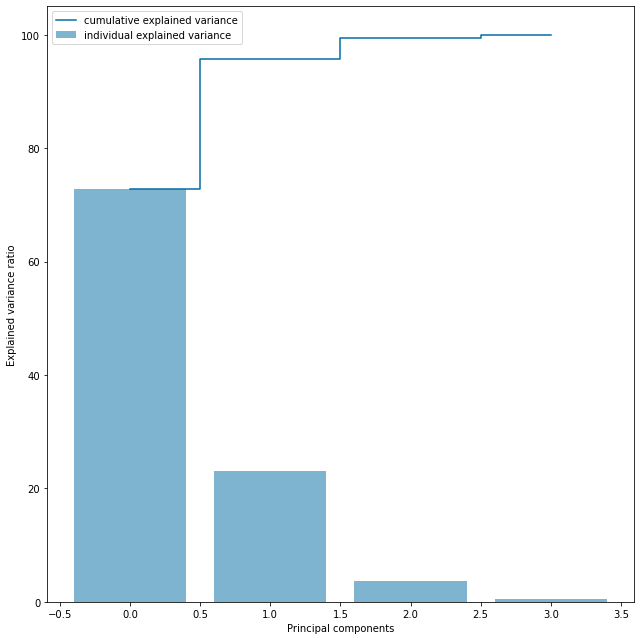

In [121]:
with plt.style.context('tableau-colorblind10'):#seaborn-whitegrid
    plt.figure(figsize=(9, 9))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

Projection Matrix

interesting part: The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. it is basically just a matrix of our concatenated top k eigenvectors.

we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [122]:
eig_pairs

[array([2.91081808, 2.91081808, 2.91081808, 2.91081808]),
 array([0.92122093, 0.92122093, 0.92122093, 0.92122093]),
 array([0.14735328, 0.14735328, 0.14735328, 0.14735328]),
 array([0.02060771, 0.02060771, 0.02060771, 0.02060771])]

In [124]:
mtx_w1 = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

ValueError: cannot reshape array of size 1 into shape (4,1)

3 - Projection Onto the New Feature Space

In [129]:
Y = X_std.dot(matrix_w)

NameError: name 'matrix_w' is not defined

In [130]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

NameError: name 'Y' is not defined

<Figure size 432x288 with 0 Axes>

Shortcut - PCA in scikit-learn

For educational purposes, long way to apply the PCA to the Iris dataset. But luckily, there is already implementation in scikit-learn.

In [125]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

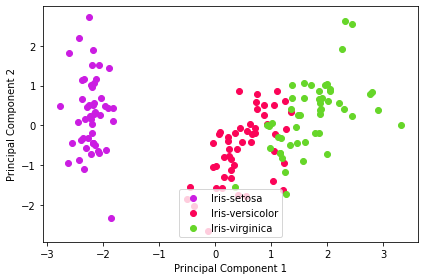

In [128]:
with plt.style.context('tableau-colorblind10'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('#cb1de2', '#fb0458', '#66d629')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()